# Making maps

A lot of data visualizations will require (or at least benefit from) having a map background.  This can be done as a simple coastline or more complicated images or features (_e.g._, bathymetry).

Python has different ways of doing this.  One popular way is with matplotlib, specifically the basemap package in map_toolkit (https://matplotlib.org/basemap/).  The basemap package is good and has a lot of features, unfortunately the development has stopped (see https://matplotlib.org/basemap/users/intro.html#cartopy-new-management-and-eol-announcement), so there is some possibility that at some point it will no longer be compatible with other packages.

Instead, cartopy is emerging as the preferred method for mapping (https://scitools.org.uk/cartopy/docs/latest/).

The two are somewhat similar in the sense that you first need to define a coordinate system and projection.  You can then "map" your output to this graphic object. In this notebook we will look at defining projections, drawing coastlines, labeling graphs and plotting thing on a map.

In [1]:
# I will use this package to stop warnings from showing in my notebook; use this with caution
import warnings
warnings.filterwarnings('ignore')

## 1. Intro to cartopy

### A. draw a coastline

We will typically first load matplotlib as our plotting package and then cartopy to work with mapping projections.  The 'crs' will provide tools for working with "coordinate reference systems".

There are many projections available in cartopy (https://scitools.org.uk/cartopy/docs/latest/crs/projections.html) and note that each has a different set of needed and optional parameters, _e.g._, some can specify a central longitude. 

In [2]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs                   # import projections
import cartopy.feature as cf                 # import features

We can now construct a map-based figure.  The syntact is like before, use matplotlib to instantiate a plot object, then use cartopy to plot a coastline.

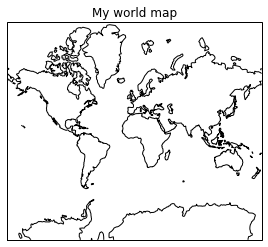

In [3]:
ax = plt.axes(projection = ccrs.Mercator())  # create a set of axes with Mercator projection
ax.add_feature(cf.COASTLINE)                 # plot some data on them
ax.set_title("My world map");                # label it

What about other projections?

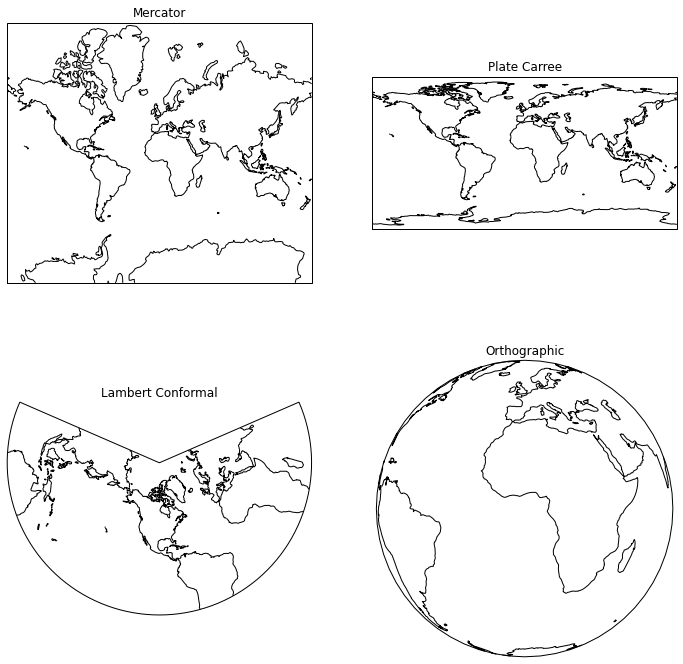

In [4]:
plt.figure(figsize=(12,12))

ax1 = plt.subplot(2,2,1,projection = ccrs.Mercator())
ax1.add_feature(cf.COASTLINE)                 
ax1.set_title("Mercator")   

ax2 = plt.subplot(2,2,2,projection = ccrs.PlateCarree())
ax2.add_feature(cf.COASTLINE)                 
ax2.set_title("Plate Carree")

ax3 = plt.subplot(2,2,3,projection = ccrs.LambertConformal())
ax3.add_feature(cf.COASTLINE)                 
ax3.set_title("Lambert Conformal")

ax4 = plt.subplot(2,2,4,projection = ccrs.Orthographic())
ax4.add_feature(cf.COASTLINE)                 
ax4.set_title("Orthographic");

### B. add some lat/lon lines and labels

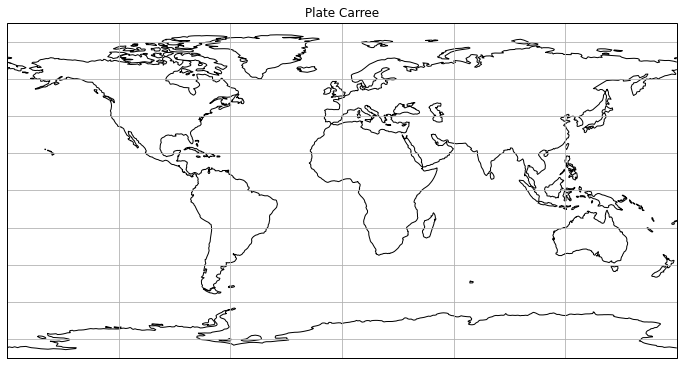

In [5]:
plt.figure(figsize=(12,8))
ax = plt.axes(projection = ccrs.PlateCarree())
ax.add_feature(cf.COASTLINE)                 
ax.set_title("Plate Carree")

# add grid lines 
ax.gridlines();

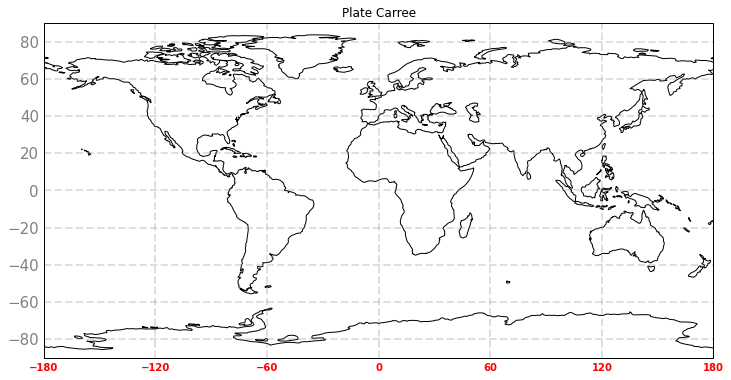

In [6]:
# add better grid lines..

# create figure 12 by 8
plt.figure(figsize=(12,8))

# define a coordinate reference system based on a Plate Carree projection
ax = plt.axes(projection = ccrs.PlateCarree())

# add coastlines and title
ax.add_feature(cf.COASTLINE)                 
ax.set_title("Plate Carree")

# create a "grid line object" called "gl" here
#  define projection, turn labels on, define linewidth, color, style)
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha = 0.25, linestyle='--')

# we can now control what lines and labels to show
#  the default is "all", but we can turn off some
#gl.xlabels_top = False
#gl.xlabels_bottom = False
#gl.ylabels_left = False
#gl.ylabels_right = False
#gl.xlines = False
#gl.yline = False

# Let's put labels on bottom and left axes
gl.xlabels_top = False
gl.ylabels_right = False

# define the label style
gl.ylabel_style = {'size': 15, 'color': 'gray'}
gl.xlabel_style = {'color': 'red', 'weight': 'bold'}

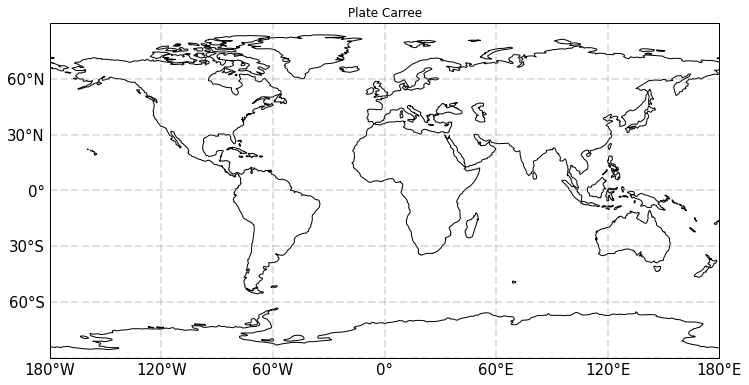

In [7]:
# add even better grid lines..

# import two additional utilities
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

# this part the same as before
plt.figure(figsize=(12,8))
ax = plt.axes(projection = ccrs.PlateCarree())
ax.add_feature(cf.COASTLINE)                 
ax.set_title("Plate Carree")

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha = 0.25, linestyle='--')

# labels on bottom and left axes
gl.xlabels_top = False
gl.ylabels_right = False

# define the label style
gl.xlabel_style = {'size': 15, 'color': 'black'}
gl.ylabel_style = {'size': 15, 'color': 'black'}

# now we define exactly which ones to label and spruce up the labels
gl.xlocator = mticker.FixedLocator([-180, -120, -60, 0, 60, 120, 180])
gl.ylocator = mticker.FixedLocator([-90, -60, -30, 0, 30, 60, 90])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

### C. draw a map of a specific region

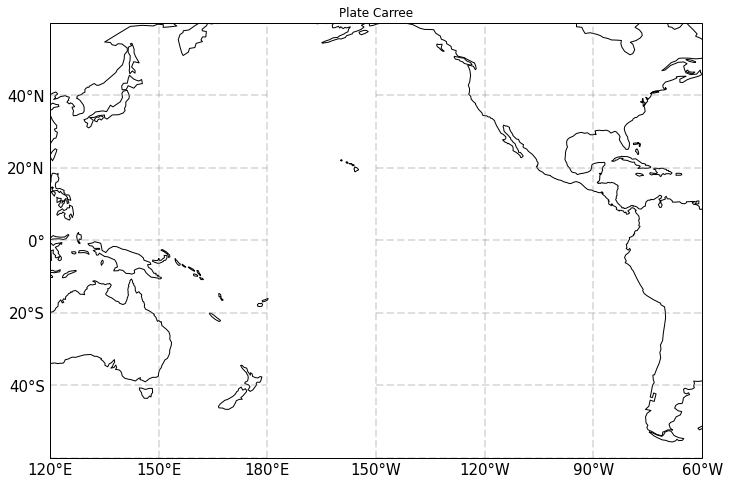

In [8]:
plt.figure(figsize=(12,8))
ax = plt.axes(projection = ccrs.PlateCarree(central_longitude=180.0))
ax.add_feature(cf.COASTLINE)                 
ax.set_title("Plate Carree")
ax.set_extent([120, 300, -60, 60], crs=ccrs.PlateCarree())

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha = 0.25, linestyle='--')

# labels on bottom and left axes
gl.xlabels_top = False
gl.ylabels_right = False

# define the label style
gl.xlabel_style = {'size': 15, 'color': 'black'}
gl.ylabel_style = {'size': 15, 'color': 'black'}

# now we define exactly which ones to label and spruce up the labels
gl.xlocator = mticker.FixedLocator([120, 150, 180, -150, -120, -90, -60])
gl.ylocator = mticker.FixedLocator([-60, -40, -20, 0, 20, 40, 60])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

### D. add text/data to map

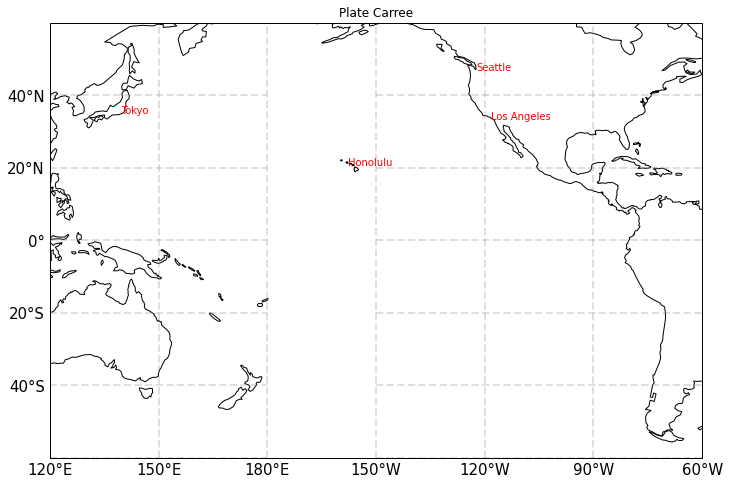

In [9]:
plt.figure(figsize=(12,8))
ax = plt.axes(projection = ccrs.PlateCarree(central_longitude=180.0))
ax.add_feature(cf.COASTLINE)                 
ax.set_title("Plate Carree")
ax.set_extent([120, 300, -60, 60], crs=ccrs.PlateCarree())

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha = 0.25, linestyle='--')

# labels on bottom and left axes
gl.xlabels_top = False
gl.ylabels_right = False

# define the label style
gl.xlabel_style = {'size': 15, 'color': 'black'}
gl.ylabel_style = {'size': 15, 'color': 'black'}

# now we define exactly which ones to label and spruce up the labels
gl.xlocator = mticker.FixedLocator([120, 150, 180, -150, -120, -90, -60])
gl.ylocator = mticker.FixedLocator([-60, -40, -20, 0, 20, 40, 60])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

# define the (lon,lat) location of some places
LOC_HONOLULU = (-157.8583,21.3069)
LOC_LOSANGELES = (-118.2437,34.0522)
LOC_TOKYO = (139.6503,35.6762)
LOC_SEATTLE = (-122.3321, 47.6062)

# plot them on the map
ax.annotate('Honolulu', xy=LOC_HONOLULU, 
            xycoords=ccrs.PlateCarree()._as_mpl_transform(ax), color='red',
            ha='left', va='center')
ax.annotate('Los Angeles', xy=LOC_LOSANGELES, 
            xycoords=ccrs.PlateCarree()._as_mpl_transform(ax), color='red',
            ha='left', va='center')
ax.annotate('Seattle', xy=LOC_SEATTLE, 
            xycoords=ccrs.PlateCarree()._as_mpl_transform(ax), color='red',
            ha='left', va='center')
ax.annotate('Tokyo', xy=LOC_TOKYO, 
            xycoords=ccrs.PlateCarree()._as_mpl_transform(ax), color='red',
            ha='left', va='center');

You can also add an image as background

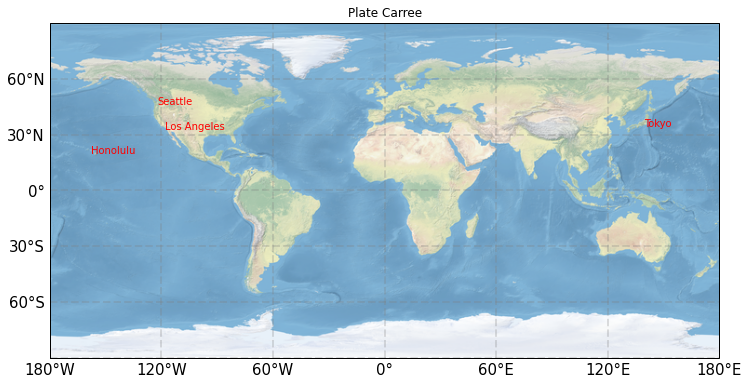

In [10]:
plt.figure(figsize=(12,8))
ax = plt.axes(projection = ccrs.PlateCarree())
ax.set_title("Plate Carree")
ax.stock_img()

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha = 0.25, linestyle='--')

# labels on bottom and left axes
gl.xlabels_top = False
gl.ylabels_right = False

# define the label style
gl.xlabel_style = {'size': 15, 'color': 'black'}
gl.ylabel_style = {'size': 15, 'color': 'black'}

# now we define exactly which ones to label and spruce up the labels
gl.xlocator = mticker.FixedLocator([-180, -120, -60, 0, 60, 120, 180])
gl.ylocator = mticker.FixedLocator([-90, -60, -30, 0, 30, 60, 90])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

# define the (lon,lat) location of some places
LOC_HONOLULU = (-157.8583,21.3069)
LOC_LOSANGELES = (-118.2437,34.0522)
LOC_TOKYO = (139.6503,35.6762)
LOC_SEATTLE = (-122.3321, 47.6062)

# plot them on the map
ax.annotate('Honolulu', xy=LOC_HONOLULU, 
            xycoords=ccrs.PlateCarree()._as_mpl_transform(ax), color='red',
            ha='left', va='center')
ax.annotate('Los Angeles', xy=LOC_LOSANGELES, 
            xycoords=ccrs.PlateCarree()._as_mpl_transform(ax), color='red',
            ha='left', va='center')
ax.annotate('Seattle', xy=LOC_SEATTLE, 
            xycoords=ccrs.PlateCarree()._as_mpl_transform(ax), color='red',
            ha='left', va='center')
ax.annotate('Tokyo', xy=LOC_TOKYO, 
            xycoords=ccrs.PlateCarree()._as_mpl_transform(ax), color='red',
            ha='left', va='center');

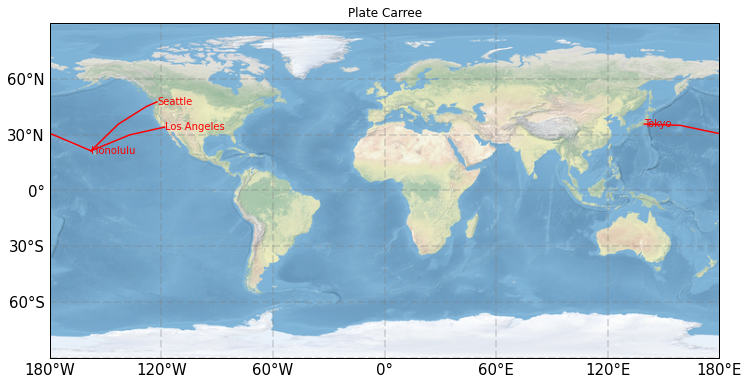

In [14]:
plt.figure(figsize=(12,8))
ax = plt.axes(projection = ccrs.PlateCarree())
ax.set_title("Plate Carree")
ax.stock_img()

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha = 0.25, linestyle='--')

# labels on bottom and left axes
gl.xlabels_top = False
gl.ylabels_right = False

# define the label style
gl.xlabel_style = {'size': 15, 'color': 'black'}
gl.ylabel_style = {'size': 15, 'color': 'black'}

# now we define exactly which ones to label and spruce up the labels
gl.xlocator = mticker.FixedLocator([-180, -120, -60, 0, 60, 120, 180])
gl.ylocator = mticker.FixedLocator([-90, -60, -30, 0, 30, 60, 90])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

# define the (lon,lat) location of some places
LOC_HONOLULU = (-157.8583,21.3069)
LOC_LOSANGELES = (-118.2437,34.0522)
LOC_TOKYO = (139.6503,35.6762)
LOC_SEATTLE = (-122.3321, 47.6062)

# plot them on the map
ax.annotate('Honolulu', xy=LOC_HONOLULU, 
            xycoords=ccrs.PlateCarree()._as_mpl_transform(ax), color='red',
            ha='left', va='center')
ax.annotate('Los Angeles', xy=LOC_LOSANGELES, 
            xycoords=ccrs.PlateCarree()._as_mpl_transform(ax), color='red',
            ha='left', va='center')
ax.annotate('Seattle', xy=LOC_SEATTLE, 
            xycoords=ccrs.PlateCarree()._as_mpl_transform(ax), color='red',
            ha='left', va='center')
ax.annotate('Tokyo', xy=LOC_TOKYO, 
            xycoords=ccrs.PlateCarree()._as_mpl_transform(ax), color='red',
            ha='left', va='center');

ax.plot([-157.8582,-118.2437], [21.3069,34.0522], color='red',  transform=ccrs.Geodetic())
ax.plot([-157.8582,139.6503], [21.3069,35.6762], color='red',  transform=ccrs.Geodetic())
ax.plot([-157.8582,-122.3321], [21.3069,47.6062], color='red',  transform=ccrs.Geodetic());

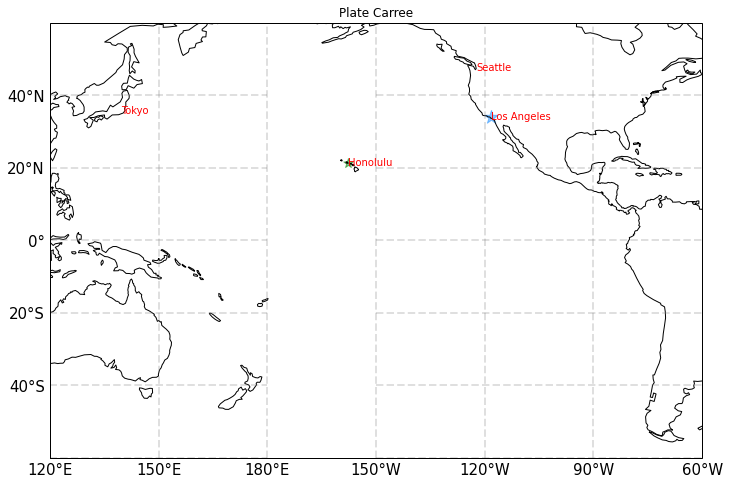

In [23]:
plt.figure(figsize=(12,8))
ax = plt.axes(projection = ccrs.PlateCarree(central_longitude=180.0))
ax.add_feature(cf.COASTLINE)                 
ax.set_title("Plate Carree")
ax.set_extent([120, 300, -60, 60], crs=ccrs.PlateCarree())

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha = 0.25, linestyle='--')

# labels on bottom and left axes
gl.xlabels_top = False
gl.ylabels_right = False

# define the label style
gl.xlabel_style = {'size': 15, 'color': 'black'}
gl.ylabel_style = {'size': 15, 'color': 'black'}

# now we define exactly which ones to label and spruce up the labels
gl.xlocator = mticker.FixedLocator([120, 150, 180, -150, -120, -90, -60])
gl.ylocator = mticker.FixedLocator([-60, -40, -20, 0, 20, 40, 60])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

# define the (lon,lat) location of some places
LOC_HONOLULU = (-157.8583,21.3069)
LOC_LOSANGELES = (-118.2437,34.0522)
LOC_TOKYO = (139.6503,35.6762)
LOC_SEATTLE = (-122.3321, 47.6062)

# plot them on the map
ax.annotate('Honolulu', xy=LOC_HONOLULU, 
            xycoords=ccrs.PlateCarree()._as_mpl_transform(ax), color='red',
            ha='left', va='center')
ax.annotate('Los Angeles', xy=LOC_LOSANGELES, 
            xycoords=ccrs.PlateCarree()._as_mpl_transform(ax), color='red',
            ha='left', va='center')
ax.annotate('Seattle', xy=LOC_SEATTLE, 
            xycoords=ccrs.PlateCarree()._as_mpl_transform(ax), color='red',
            ha='left', va='center')
ax.annotate('Tokyo', xy=LOC_TOKYO, 
            xycoords=ccrs.PlateCarree()._as_mpl_transform(ax), color='red',
            ha='left', va='center')

# add some data
plt.scatter(x=LOC_HONOLULU[0], y=LOC_HONOLULU[1],
            color="green",
            s=100,
            marker ='*',
            alpha=0.5,
            transform=ccrs.PlateCarree())
plt.scatter(x=LOC_LOSANGELES[0], y=LOC_LOSANGELES[1],
            color="dodgerblue",
            s=200,
            marker ='*',
            alpha=0.5,
            transform=ccrs.PlateCarree());

## 2. Working with "GIS" data

Geospatial data (aka GIS data) usually requires specific software to analyse and plot, _e.g._, ArcGIS or QGIS.  The data types are usually either "rasters" or "vectors", and a common format in GIS applications is a shapefile.

We mentioned reading shapefiles in a (much) earlier class, but here we will show how cartopy can be used to interact with GIS data.

In [24]:
import cartopy
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
from shapely.geometry import LineString, MultiLineString

### A. read shapefiles and highligh specific country

In [54]:
shpfilename = shpreader.natural_earth(resolution='110m',
                                      category='cultural',
                                      name='admin_0_countries')
reader = shpreader.Reader(shpfilename)
countries = reader.records()

country1 = next(countries)
country1.attributes.keys()

dict_keys(['featurecla', 'scalerank', 'LABELRANK', 'SOVEREIGNT', 'SOV_A3', 'ADM0_DIF', 'LEVEL', 'TYPE', 'ADMIN', 'ADM0_A3', 'GEOU_DIF', 'GEOUNIT', 'GU_A3', 'SU_DIF', 'SUBUNIT', 'SU_A3', 'BRK_DIFF', 'NAME', 'NAME_LONG', 'BRK_A3', 'BRK_NAME', 'BRK_GROUP', 'ABBREV', 'POSTAL', 'FORMAL_EN', 'FORMAL_FR', 'NAME_CIAWF', 'NOTE_ADM0', 'NOTE_BRK', 'NAME_SORT', 'NAME_ALT', 'MAPCOLOR7', 'MAPCOLOR8', 'MAPCOLOR9', 'MAPCOLOR13', 'POP_EST', 'POP_RANK', 'GDP_MD_EST', 'POP_YEAR', 'LASTCENSUS', 'GDP_YEAR', 'ECONOMY', 'INCOME_GRP', 'WIKIPEDIA', 'FIPS_10_', 'ISO_A2', 'ISO_A3', 'ISO_A3_EH', 'ISO_N3', 'UN_A3', 'WB_A2', 'WB_A3', 'WOE_ID', 'WOE_ID_EH', 'WOE_NOTE', 'ADM0_A3_IS', 'ADM0_A3_US', 'ADM0_A3_UN', 'ADM0_A3_WB', 'CONTINENT', 'REGION_UN', 'SUBREGION', 'REGION_WB', 'NAME_LEN', 'LONG_LEN', 'ABBREV_LEN', 'TINY', 'HOMEPART', 'MIN_ZOOM', 'MIN_LABEL', 'MAX_LABEL', 'NE_ID', 'WIKIDATAID', 'NAME_AR', 'NAME_BN', 'NAME_DE', 'NAME_EN', 'NAME_ES', 'NAME_FR', 'NAME_EL', 'NAME_HI', 'NAME_HU', 'NAME_ID', 'NAME_IT', 'NAME

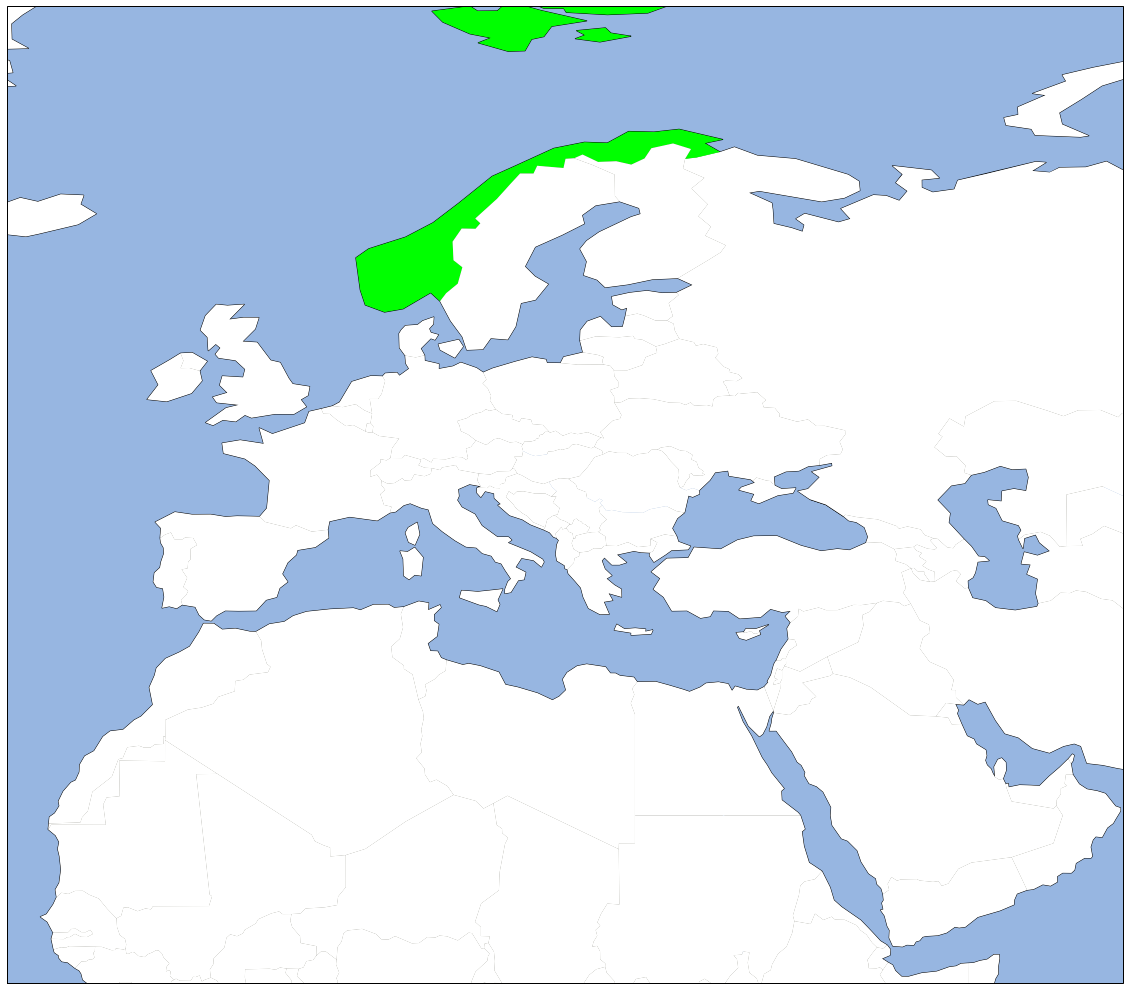

In [26]:
# just like before, create a graphic object using a PlateCarree projection
ax = plt.axes(projection=ccrs.PlateCarree())

# now add a bunch o'features
#  land, ocean, coast, borders, lakes, rivers
ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.COASTLINE)
ax.add_feature(cartopy.feature.BORDERS, linestyle='-', alpha=.5)
ax.add_feature(cartopy.feature.LAKES, alpha=0.95)
ax.add_feature(cartopy.feature.RIVERS)

# 'zoom' into a region
ax.set_extent([-20, 60, 10, 80],crs = ccrs.PlateCarree())

# read in shapefile (note this one comes with our install)
shpfilename = shpreader.natural_earth(resolution='110m',
                                      category='cultural',
                                      name='admin_0_countries')
reader = shpreader.Reader(shpfilename)
countries = reader.records()

# highligh specific country
for country in countries:
    if country.attributes['SOVEREIGNT'] == "Norway":
        ax.add_geometries(country.geometry, ccrs.PlateCarree(), facecolor=(0, 1, 0))
    else:
        ax.add_geometries(country.geometry, ccrs.PlateCarree(), facecolor=(1, 1, 1))
plt.rcParams["figure.figsize"] = (20,20)

### B. make a map using an attribute from the shapefile

Typically shapefiles have a database attached, and we can access this information in our plots.  In this case, we look for the gross regional product (GRP).  We can then make a "heat map", _i.e._, color shade by this value.

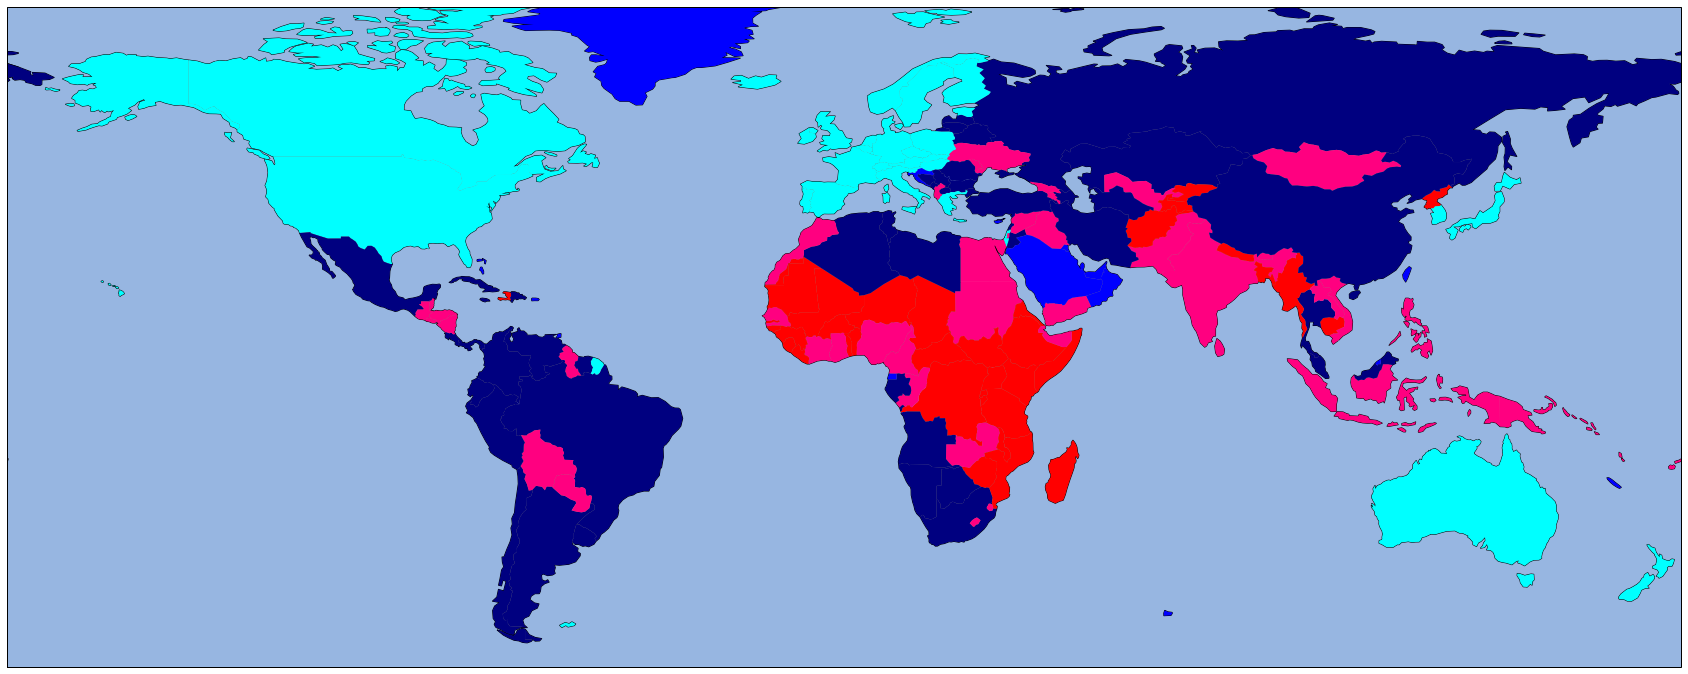

In [40]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.COASTLINE)
ax.add_feature(cartopy.feature.BORDERS, linestyle='-', alpha=.5)
ax.add_feature(cartopy.feature.LAKES, alpha=0.3)
ax.add_feature(cartopy.feature.RIVERS)

ax.set_extent([-150, 60, -25, 60])

shpfilename = shpreader.natural_earth(resolution='110m', category='cultural', 
                                      name='admin_0_countries')
reader = shpreader.Reader(shpfilename)
countries = reader.records()

# loop through all countries, color shade as follows:
#   GRP starts with 1: cyan
#   GRP starts with 2: blue
#   GRP starts with 3: navy blue
#   GRP starts with 4: pink
#   GRP starts with 5: red
for country in countries:
    if country.attributes['INCOME_GRP'].startswith("1"):
        ax.add_geometries(country.geometry, ccrs.PlateCarree(), facecolor=(0, 1, 1))
    elif country.attributes['INCOME_GRP'].startswith("2"):
        ax.add_geometries(country.geometry, ccrs.PlateCarree(), facecolor=(0, 0, 1))            
    elif country.attributes['INCOME_GRP'].startswith("3"):
        ax.add_geometries(country.geometry, ccrs.PlateCarree(), facecolor=(0, 0, 0.5))
    elif country.attributes['INCOME_GRP'].startswith("4"):
        ax.add_geometries(country.geometry, ccrs.PlateCarree(), facecolor=(1, 0, 0.5))
    elif country.attributes['INCOME_GRP'].startswith("5"):
        ax.add_geometries(country.geometry, ccrs.PlateCarree(), facecolor=(1, 0, 0))

add labels to countries

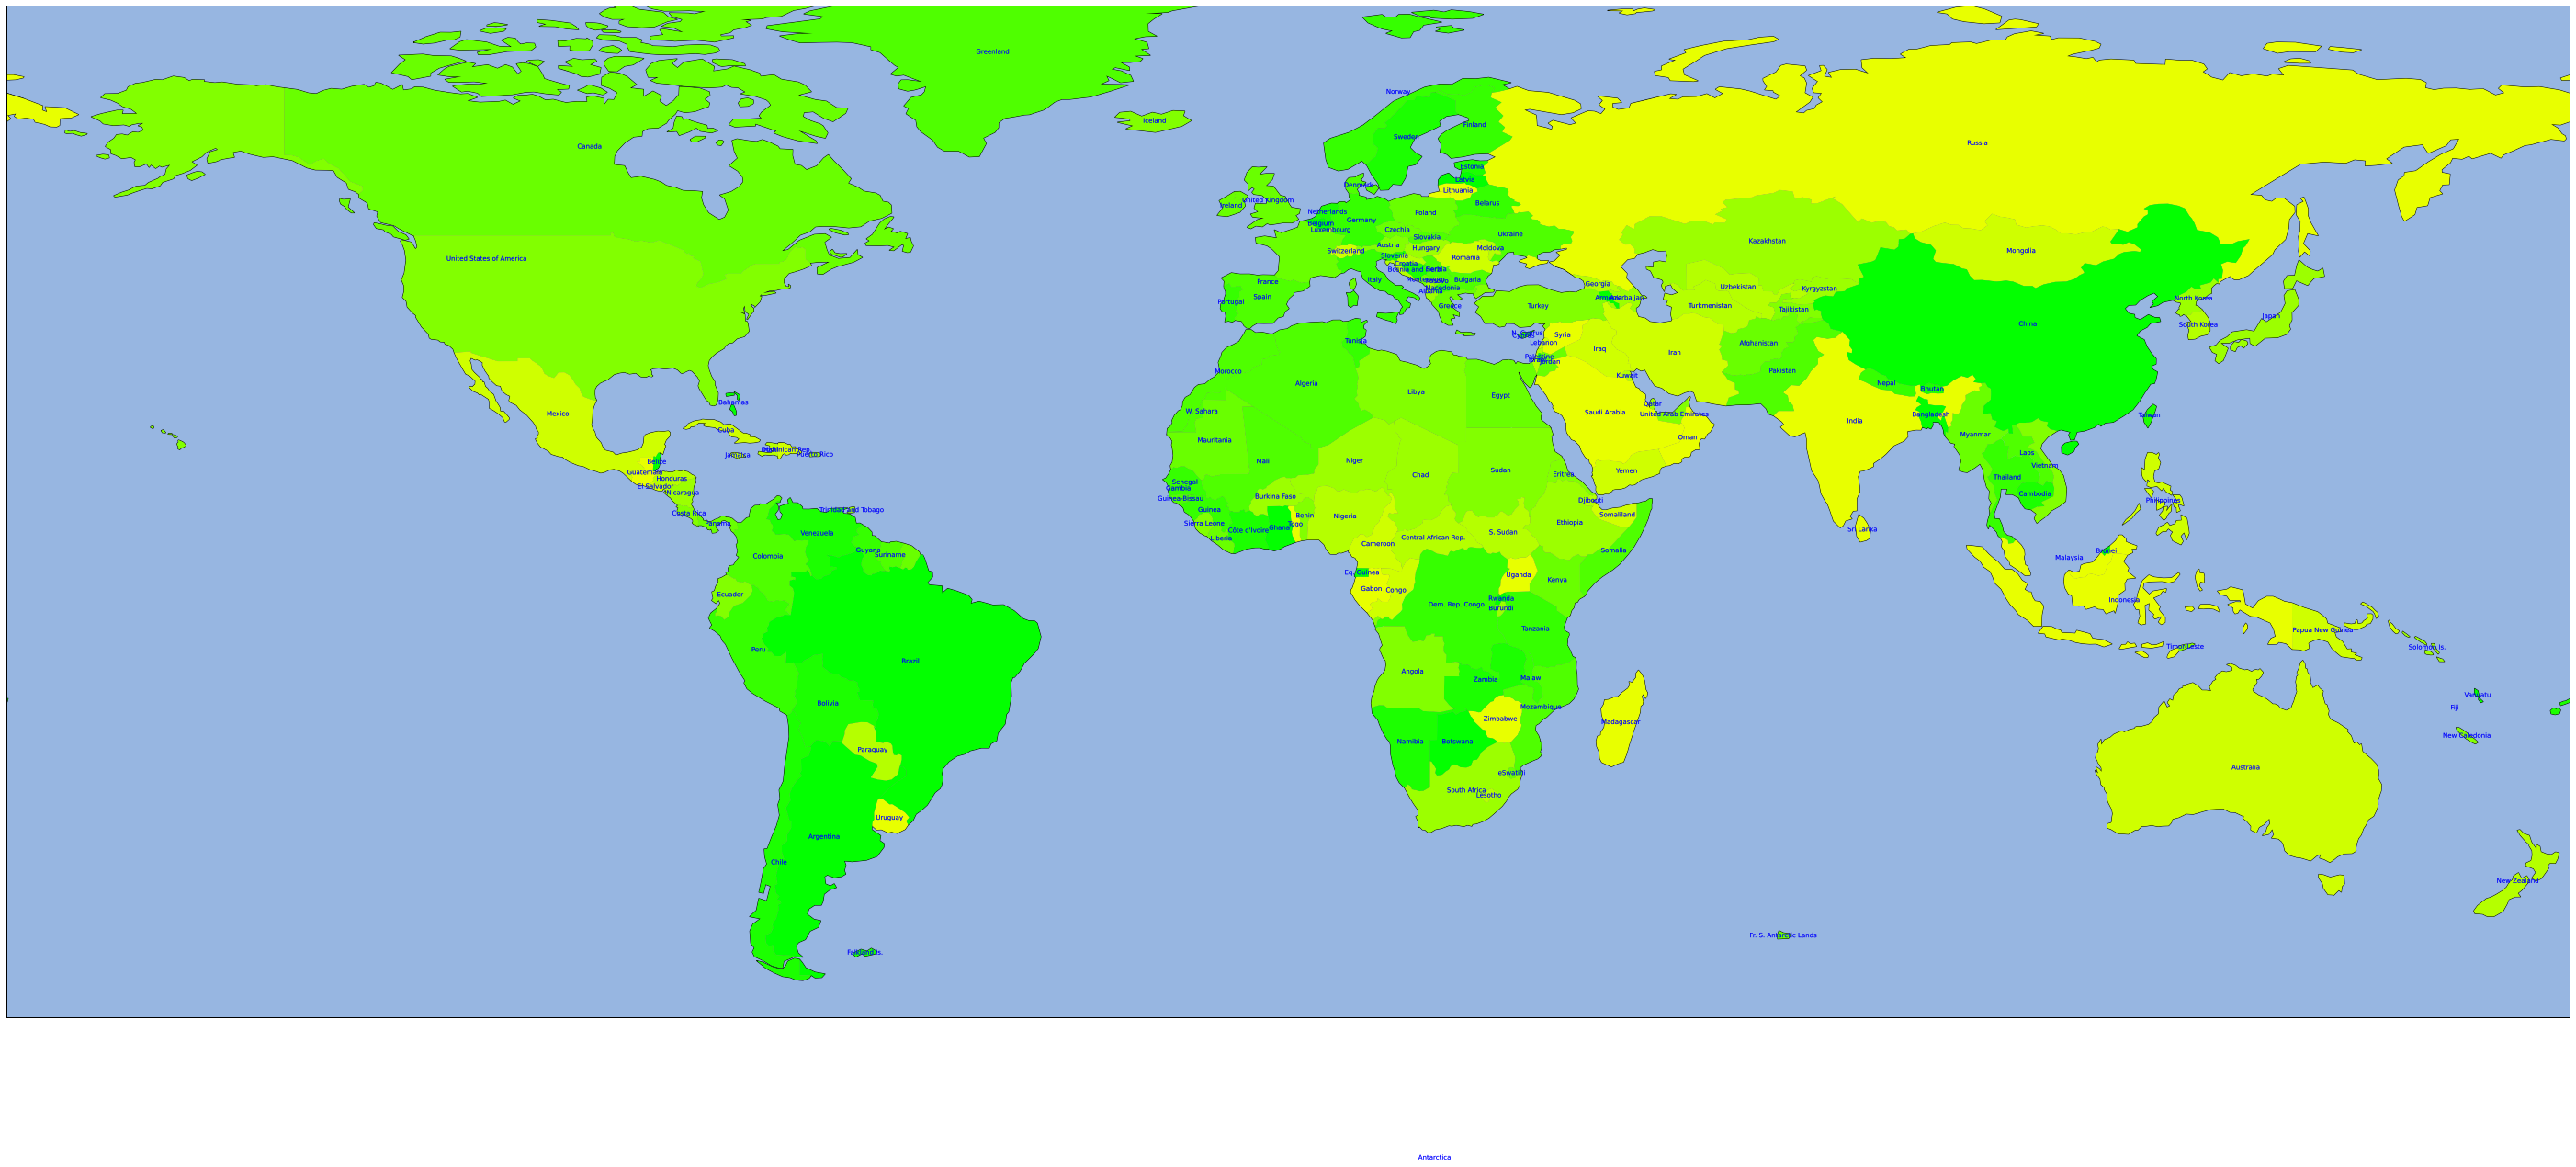

In [46]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.COASTLINE)
ax.add_feature(cartopy.feature.BORDERS, linestyle='-', alpha=.5)
ax.add_feature(cartopy.feature.LAKES, alpha=0.3)
ax.add_feature(cartopy.feature.RIVERS)

ax.set_extent([-150, 60, -25, 60])

my_color = 0.01
for country in countries:
    my_color = my_color + .1
    if my_color > 1:
        my_color = .01
    g = ax.add_geometries(country.geometry, ccrs.PlateCarree(), 
                          facecolor=(my_color, 1, 0))
    x = country.geometry.centroid.x        
    y = country.geometry.centroid.y
    ax.text(x, y, country.attributes['NAME'], color='blue', size=7, 
            ha='center', va='center', transform=ccrs.PlateCarree(), 
            path_effects=[PathEffects.withStroke(linewidth=0, foreground="k", 
                                                 alpha=.6)])